 ### problem statement : 
* Predict students final exam score based on the number of hours they study.

Dataset:
   hours_study  exam_score
0            2          50
1            3          60
2            4          70
3            5          76
4            6          80
5            7          85
6            8          90
7            9          95
8           10          98

Model Performance:
R² Score: 0.997
Mean Squared Error: 0.944
Model Equation: Score = 44.00 + 5.74 × Hours



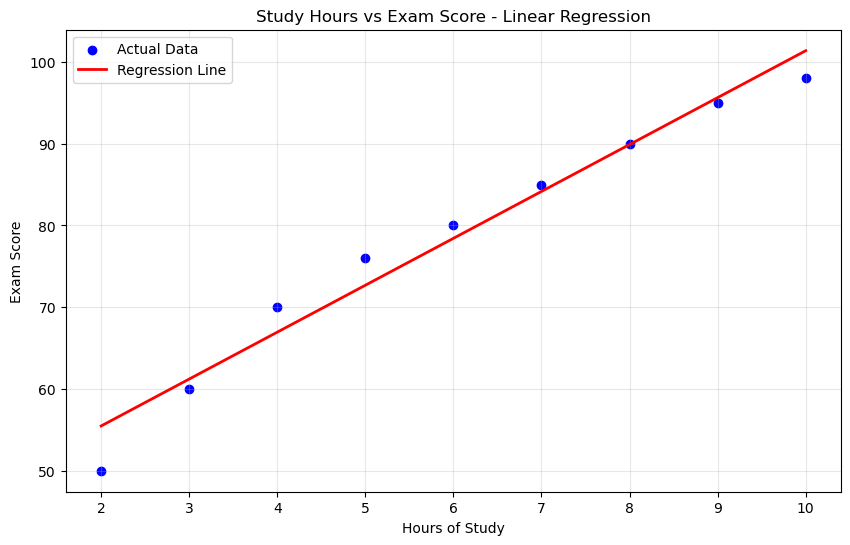

Enter the number of hours you study:  8


Predicted Exam Score: 89.90
This prediction is within the training data range.


In [31]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore', message='X does not have valid feature names')

# Step 2 - get the data here we create the simple data using list 
data = {'hours_study': [2,3,4,5,6,7,8,9,10], 'exam_score': [50,60,70,76,80,85,90,95,98]}

# Step 3 - data convert to features [columns]
df = pd.DataFrame(data)
print("Dataset:")
print(df)
print()

# Step 4 - Define features and target
X = df[['hours_study']]  # Features (independent variable)
y = df['exam_score']     # Target (dependent variable) - no need for double brackets

# Step 5 - Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6 - Create model
model = LinearRegression()

# Step 7 - Train the model
model.fit(X_train, y_train)

# Step 8 - Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Model Performance:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Model Equation: Score = {model.intercept_:.2f} + {model.coef_[0]:.2f} × Hours")
print()

# Step 9 - Visualize the data and model
plt.figure(figsize=(10, 6))
plt.scatter(df['hours_study'], df['exam_score'], color='blue', label='Actual Data')
plt.plot(df['hours_study'], model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Hours of Study')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score - Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Step 10 - User input testing
try:
    user_input = float(input("Enter the number of hours you study: "))
    
    # Add some validation
    if user_input < 0:
        print("Study hours cannot be negative!")
    elif user_input > 20:  # Reasonable upper limit
        print("Warning: Predicting for unusually high study hours. Results may be unreliable.")
    
    predicted_score = model.predict([[user_input]])
    print(f"Predicted Exam Score: {predicted_score[0]:.2f}")
    
    # Show confidence in prediction
    if 2 <= user_input <= 10:
        print("This prediction is within the training data range.")
    else:
        print("This prediction is outside the training data range - use with caution.")
        
except ValueError:
    print("Please enter a valid number!")